In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
df = sns.load_dataset('titanic')

In [115]:
print(df.isnull().sum())
print(df.isnull().mean())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64


<Axes: >

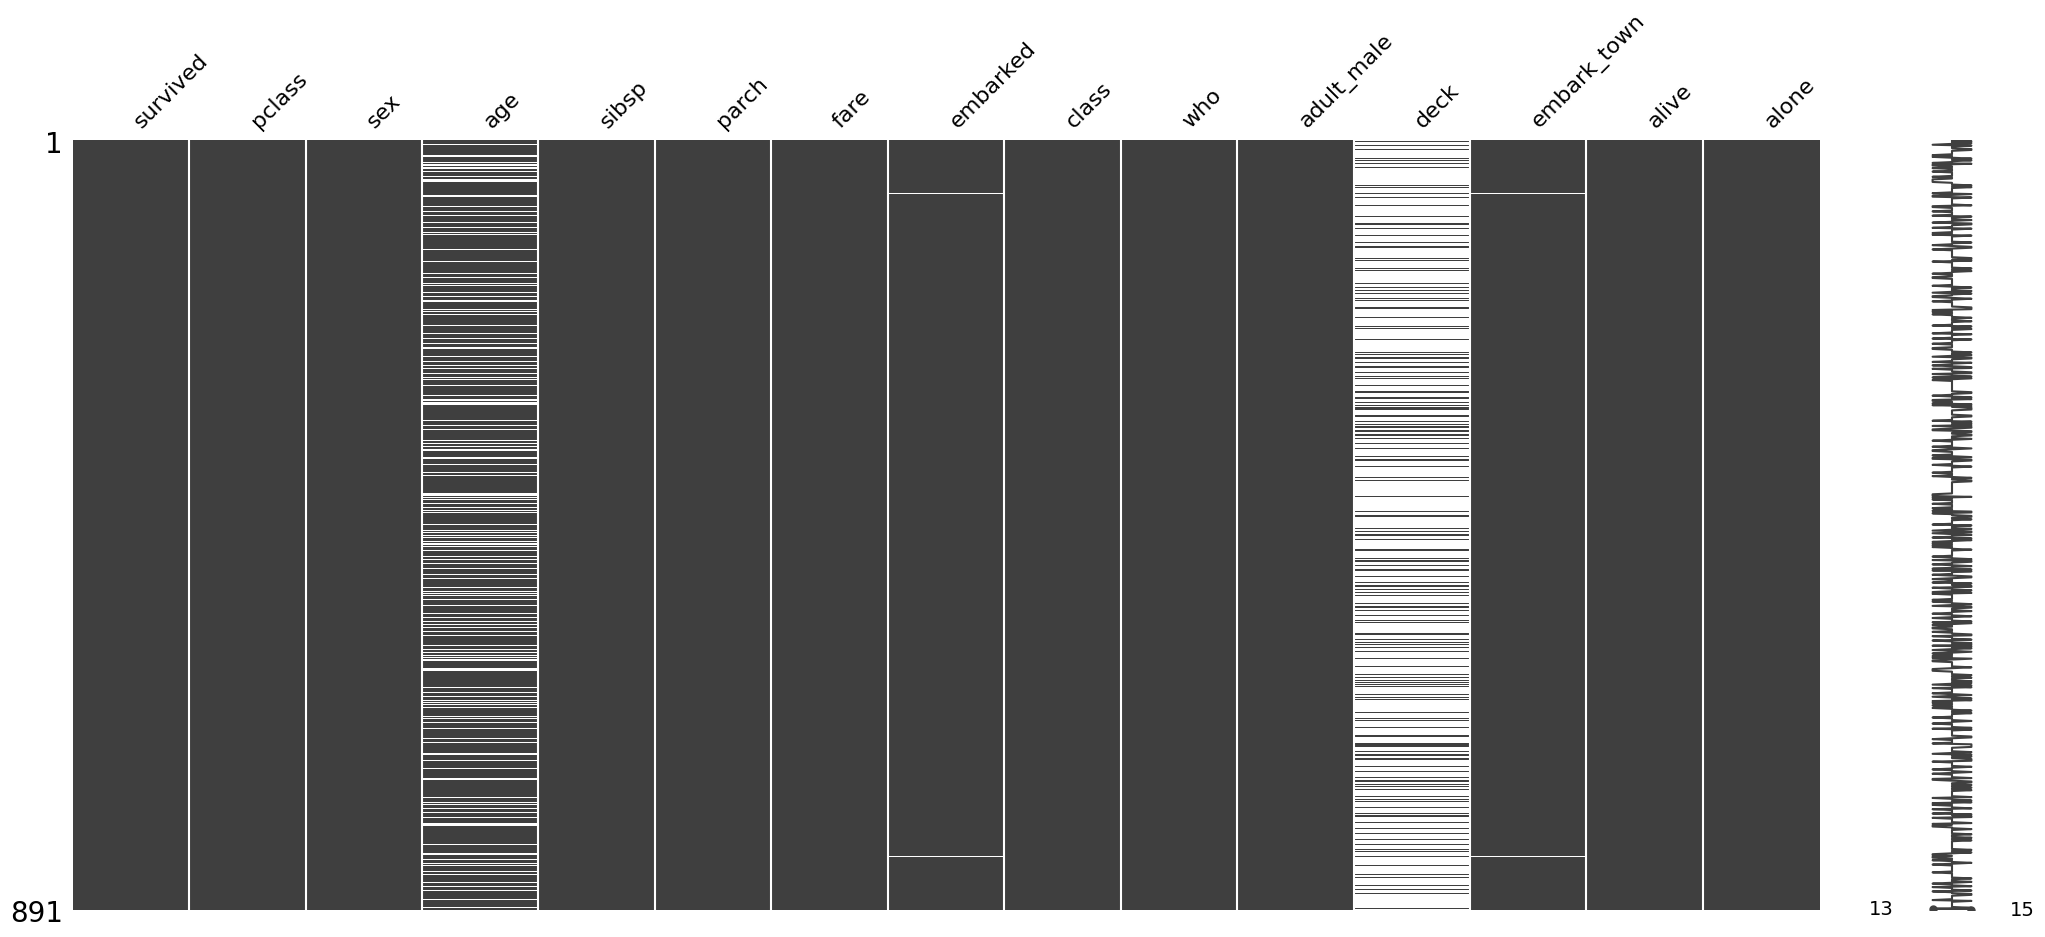

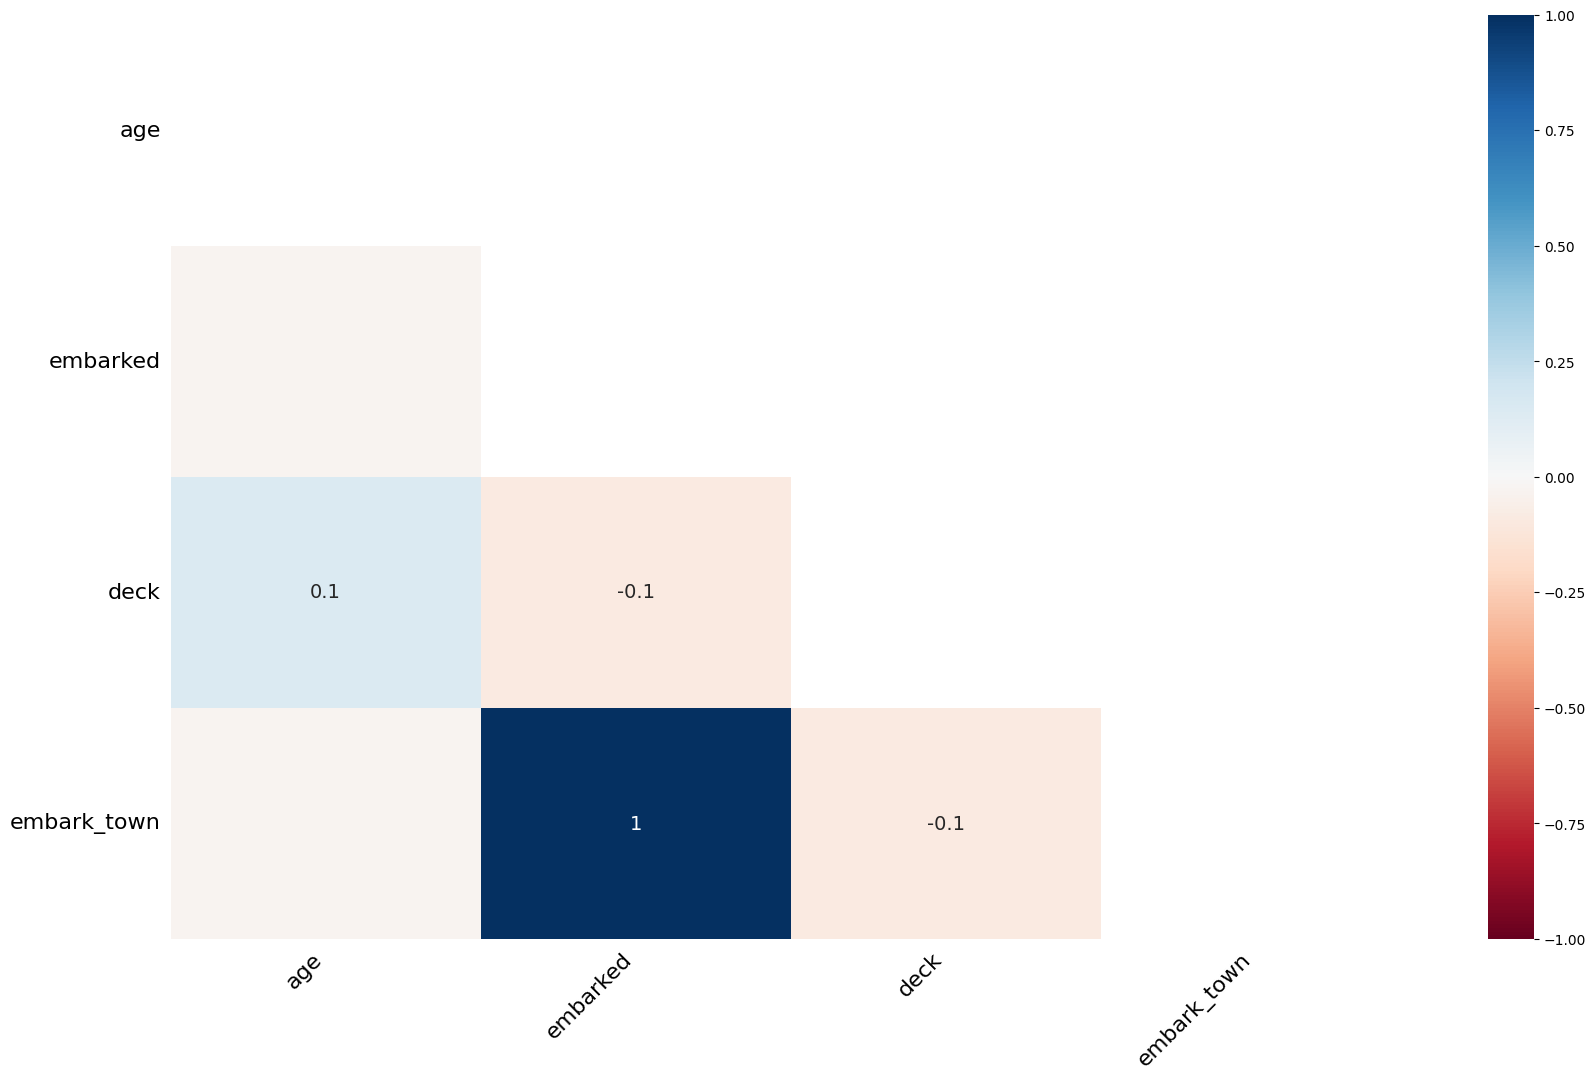

In [116]:
# 결측치 시각화 도구
import missingno as msno
msno.matrix(df)
msno.heatmap(df)

In [117]:
df.drop('deck', axis=1, inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [118]:
# dropna
df_drop = df.dropna(subset=['age', 'embarked'])
print(df_drop.isnull().sum())
print(df_drop.isnull().mean())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64
survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64


In [119]:
df_drop2 = df.dropna(axis=0, thresh=5, subset='age', inplace=False)
print(df_drop2.isnull().sum())
print(df_drop2.isnull().mean())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64
survived      NaN
pclass        NaN
sex           NaN
age           NaN
sibsp         NaN
parch         NaN
fare          NaN
embarked      NaN
class         NaN
who           NaN
adult_male    NaN
embark_town   NaN
alive         NaN
alone         NaN
dtype: float64


In [120]:
# fillna
df_fill = df.copy()
df_fill['age'] = df_fill['age'].fillna(df['age'].mean())
print(df_fill.isnull().sum())
print(df_fill.isnull().mean())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64
survived       0.000000
pclass         0.000000
sex            0.000000
age            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64


In [121]:
df_fill2 = df.copy()
df_fill2['age'] = df_fill2['age'].fillna(method='ffill', limit=2)
print(df_fill2.isnull().sum())
print(df_fill2.isnull().mean())

survived       0
pclass         0
sex            0
age            5
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64
survived       0.000000
pclass         0.000000
sex            0.000000
age            0.005612
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64


C:\Users\YongTae\AppData\Local\Temp\ipykernel_13764\283429179.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fill2['age'] = df_fill2['age'].fillna(method='ffill', limit=2)


In [122]:
comparison = df['age'].isnull() & ~df_fill2['age'].isnull()
comparison.sum()

np.int64(172)

In [123]:
# 추가실습
# 1. 그룹별로 묶어 결측치 처리
df_group_fill = df.copy()
df_group_fill.dropna(axis=0, subset='embarked', inplace=True)
df_group_fill['age'] = df_group_fill.groupby(['sex', 'pclass'])['age'].transform(lambda x: x.fillna(x.median()))
print(df_group_fill.isnull().sum())
print(df_group_fill.isnull().mean())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64
survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64


In [124]:
# 2. 결측치 대체가 결과에 미치는 영향
print(df.isnull().sum())
df.groupby(['survived'])['age'].mean()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64


survived
0    30.626179
1    28.343690
Name: age, dtype: float64

In [125]:
def get_age_range(age):
    return age // 10 * 10

df['age_range'] = df['age'].transform(get_age_range)
df[['age', 'age_range']].head(10)

,age,age_range
0,22.0,20.0
1,38.0,30.0
2,26.0,20.0
3,35.0,30.0
4,35.0,30.0
5,NaN,NaN
6,54.0,50.0
7,2.0,0.0
8,27.0,20.0
9,14.0,10.0


In [126]:
df.groupby(['age_range'])['survived'].mean()

age_range
0.0     0.612903
10.0    0.401961
20.0    0.350000
30.0    0.437126
40.0    0.382022
50.0    0.416667
60.0    0.315789
70.0    0.000000
80.0    1.000000
Name: survived, dtype: float64

In [127]:
df['age'] = df['age'].fillna(df['age'].mean())
df.groupby(['survived'])['age'].mean()

survived
0    30.415100
1    28.549778
Name: age, dtype: float64

In [128]:
df['age_range'] = df['age'].transform(get_age_range)
df.groupby(['age_range'])['survived'].mean()

age_range
0.0     0.612903
10.0    0.401961
20.0    0.324937
30.0    0.437126
40.0    0.382022
50.0    0.416667
60.0    0.315789
70.0    0.000000
80.0    1.000000
Name: survived, dtype: float64